In [1]:
import pandas as pd



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


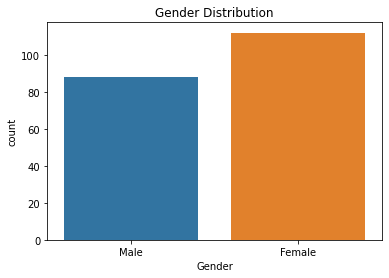

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


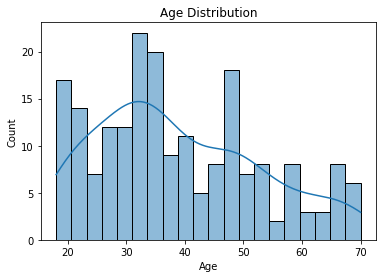

In [10]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


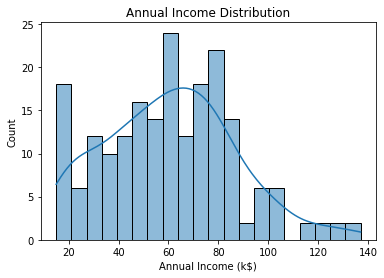

In [11]:
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()


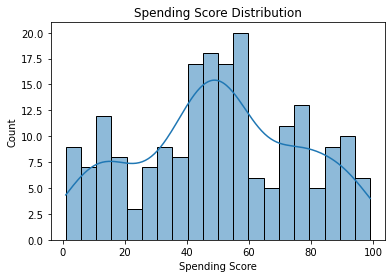

In [12]:
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()


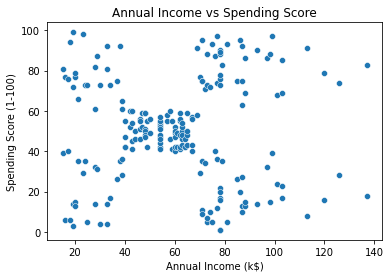

In [13]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [14]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


C:\Users\varsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


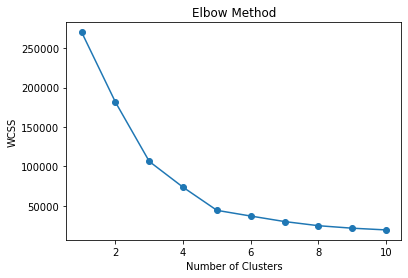

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


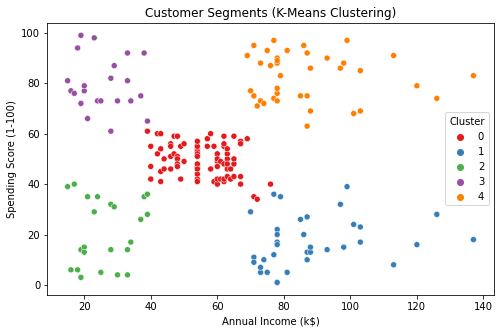

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Cluster', 
                palette='Set1', 
                data=df)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [18]:
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,164.371429,41.114286,88.200000,17.114286
2,23.000000,45.217391,26.304348,20.913043
3,23.090909,25.272727,25.727273,79.363636
4,162.000000,32.692308,86.538462,82.128205


In [19]:
df.to_csv("Mall_Customers_Segmented.csv", index=False)
